<a href="https://colab.research.google.com/github/KumarPatil23/CODSOFT/blob/main/task_5_Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CODSOFT INTERNSHIP**

TASK - 5 : CREDIT CARD FRAUD DETECTION

Author : Kumar Patil

Domain : Data Science

Batch : 1 January

AIM

The aim of this project is to build a machine learning model to detect fraudulent credit card transactions. By analyzing transaction data, the project identifies patterns that distinguish fraud from legitimate activity. Key steps include data preprocessing, balancing the dataset, and training a Random Forest classifier. The model's performance is evaluated using metrics like accuracy and precision. This system aims to enhance fraud detection, reduce financial losses, and improve transaction security.

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
# Load the dataset
data = pd.read_csv('/content/creditcard.csv')

# Display basic dataset information
print("Dataset Information:")
data.info()
print("\nFirst 5 Rows:")


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17918 entries, 0 to 17917
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    17918 non-null  int64  
 1   V1      17918 non-null  float64
 2   V2      17918 non-null  float64
 3   V3      17918 non-null  float64
 4   V4      17918 non-null  float64
 5   V5      17917 non-null  float64
 6   V6      17917 non-null  float64
 7   V7      17917 non-null  float64
 8   V8      17917 non-null  float64
 9   V9      17917 non-null  float64
 10  V10     17917 non-null  float64
 11  V11     17917 non-null  float64
 12  V12     17917 non-null  float64
 13  V13     17917 non-null  float64
 14  V14     17917 non-null  float64
 15  V15     17917 non-null  float64
 16  V16     17917 non-null  float64
 17  V17     17917 non-null  float64
 18  V18     17917 non-null  float64
 19  V19     17917 non-null  float64
 20  V20     17917 non-null  float64
 21  V21     17917 

In [3]:
print(data.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0     0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1     0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2     1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3     1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4     2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 


Class Distribution:
Class
0.0    17836
1.0       81
Name: count, dtype: int64


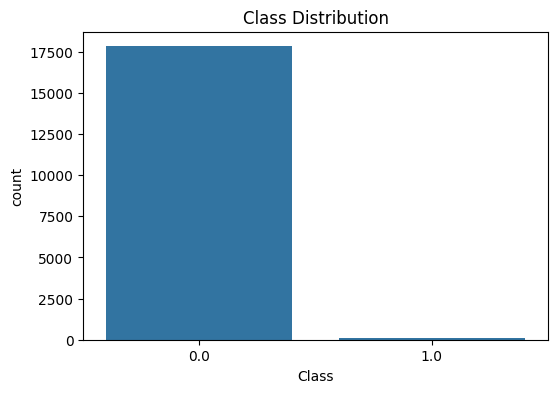

In [4]:
# Check class distribution
print("\nClass Distribution:")
print(data['Class'].value_counts())

# Visualize class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=data)
plt.title('Class Distribution')
plt.show()


In [5]:
# Standardize 'Time' and 'Amount' columns
scaler = StandardScaler()
data[['Time', 'Amount']] = scaler.fit_transform(data[['Time', 'Amount']])

# Separate features and target variable
X = data.drop(columns=['Class'])
y = data['Class']

In [6]:
# Balance the dataset (undersampling)
fraud = data[data['Class'] == 1]
non_fraud = data[data['Class'] == 0].sample(len(fraud), random_state=42)
balanced_data = pd.concat([fraud, non_fraud])

# Split balanced data into features and target
X_balanced = balanced_data.drop(columns=['Class'])
y_balanced = balanced_data['Class']


In [7]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_balanced, y_balanced, test_size=0.2, random_state=42, stratify=y_balanced
)


In [8]:
# Train a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [9]:
# Make predictions
y_pred = rf_classifier.predict(X_test)

In [10]:
# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Print results
print("\nConfusion Matrix:")
print(conf_matrix)

print("\nClassification Report:")
print(class_report)

print("\nAccuracy Score: {:.2f}%".format(accuracy * 100))


Confusion Matrix:
[[17  0]
 [ 1 15]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97        17
         1.0       1.00      0.94      0.97        16

    accuracy                           0.97        33
   macro avg       0.97      0.97      0.97        33
weighted avg       0.97      0.97      0.97        33


Accuracy Score: 96.97%


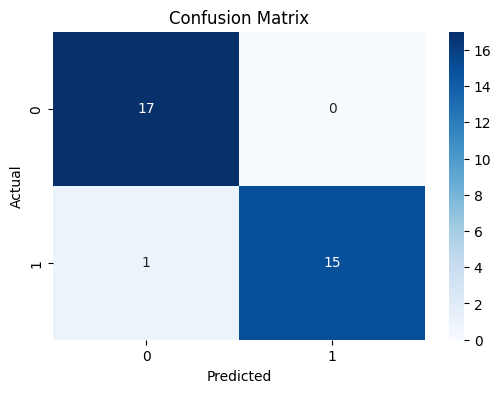

In [11]:
# Visualize the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()